In [220]:
# Começamos importando algumas bibliotecas.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from random import sample
from math import sqrt

In [ ]:
# Caso você não possua alguma destas bibliotecas, execute o comando abaixo
!pip install numpy pandas matplotlib scikit-learn --user

# Métodos de agrupamento: K-means

Nesta atividade, vamos implementar um método de agrupamento simples conhecido como K-means (https://en.wikipedia.org/wiki/K-means_clustering). O objetivo do algoritmo é separar um conjunto de pontos em K grupos diferentes. Normalmente você deve conhecer o valor correto de K e passar como parâmetro para o algoritmo. No nosso caso, vamos passar o valor K=5, que corresponde ao número de grupos ancestrais nos dados genéticos apresentados na aula passada: "África, América, Ásia, Europa, Quilombolas".

Você pode ver um exemplo de execução do algoritmo em um conjunto de dados aleatório no vídeo https://www.youtube.com/watch?v=5I3Ei69I40s e interagir com um exemplo interativo em http://stanford.edu/class/ee103/visualizations/kmeans/kmeans.html.

## Passo 1: Carregar o conjunto de dados

Utilizamos o Pandas para carregar o dataframe a partir de um arquivo no Github. Vamos carregar estes dados e remover a coluna de "continentes", já que queremos que o K-means descubra esta informação.

In [222]:
url = 'https://raw.githubusercontent.com/fabiommendes/desenvolvimento-de-software/master/dados/populations.csv'
dados_brutos = pd.read_csv(url, index_col=0)
continentes = dados_brutos.pop('continent')

display(dados_brutos)

,rs2307666,rs1610863,rs16635,rs1610965,rs35451359,rs140837,rs1160893,rs2308203,rs33974167,rs1160852,...,rs2307998,rs2307803,rs2307930,rs25630,rs2307582,rs2307922,rs11267926,rs25584,rs2307799,rs34541393
sample id,,,,,,,,,,,,,,,,,,,,,
HGDP00452,2.0,2.0,0.0,0.0,2.0,1.0,2.0,2.0,0.0,1.0,...,1.0,2.0,0.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0
HGDP00453,1.0,0.0,1.0,1.0,2.0,1.0,2.0,2.0,0.0,0.0,...,0.0,1.0,0.0,2.0,2.0,2.0,1.0,0.0,2.0,2.0
HGDP00454,2.0,2.0,0.0,2.0,2.0,2.0,0.0,2.0,1.0,0.0,...,0.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0
HGDP00455,2.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,2.0,0.0,2.0,2.0,2.0,2.0,1.0,2.0,0.0
HGDP00457,2.0,0.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,...,0.0,1.0,0.0,2.0,2.0,2.0,2.0,0.0,2.0,2.0
HGDP00458,2.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,0.0,...,1.0,1.0,1.0,2.0,2.0,2.0,2.0,0.0,2.0,0.0
HGDP00459,2.0,2.0,0.0,2.0,1.0,1.0,2.0,2.0,1.0,0.0,...,0.0,1.0,0.0,2.0,1.0,2.0,2.0,0.0,2.0,2.0
HGDP00460,2.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,0.0,1.0,...,1.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0
HGDP00461,1.0,0.0,0.0,2.0,0.0,2.0,1.0,2.0,1.0,0.0,...,0.0,2.0,0.0,2.0,1.0,2.0,2.0,0.0,2.0,1.0


## Passo 2: Limpar o conjunto de dados

Os dados brutos possuem algums elementos NaN (not a number). É necessário atribuir algum valor a estes elementos. Estude a função [fillna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html) do Pandas para descobrir como preencher estes valores com alguma estimativa razoável. 

In [223]:
# Implemente a estratégia correta de utilizar o fillna. Uma sugestão é preencher
# o valor de cada NaN pela média da sua coluna.
dados = dados_brutos.fillna(dados_brutos.mean())
dados

,rs2307666,rs1610863,rs16635,rs1610965,rs35451359,rs140837,rs1160893,rs2308203,rs33974167,rs1160852,...,rs2307998,rs2307803,rs2307930,rs25630,rs2307582,rs2307922,rs11267926,rs25584,rs2307799,rs34541393
sample id,,,,,,,,,,,,,,,,,,,,,
HGDP00452,2.000000,2.000000,0.000000,0.000000,2.000000,1.000000,2.00000,2.000000,0.000000,1.000000,...,1.000000,2.000000,0.000000,2.00000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000
HGDP00453,1.000000,0.000000,1.000000,1.000000,2.000000,1.000000,2.00000,2.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,2.00000,2.000000,2.000000,1.000000,0.000000,2.000000,2.000000
HGDP00454,2.000000,2.000000,0.000000,2.000000,2.000000,2.000000,0.00000,2.000000,1.000000,0.000000,...,0.000000,2.000000,0.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000
HGDP00455,2.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,0.000000,...,0.000000,2.000000,0.000000,2.00000,2.000000,2.000000,2.000000,1.000000,2.000000,0.000000
HGDP00457,2.000000,0.000000,1.000000,1.000000,1.000000,2.000000,2.00000,1.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,2.00000,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000
HGDP00458,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.00000,2.000000,1.000000,0.000000,...,1.000000,1.000000,1.000000,2.00000,2.000000,2.000000,2.000000,0.000000,2.000000,0.000000
HGDP00459,2.000000,2.000000,0.000000,2.000000,1.000000,1.000000,2.00000,2.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,2.00000,1.000000,2.000000,2.000000,0.000000,2.000000,2.000000
HGDP00460,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.00000,1.000000,0.000000,1.000000,...,1.000000,2.000000,1.000000,2.00000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000
HGDP00461,1.000000,0.000000,0.000000,2.000000,0.000000,2.000000,1.00000,2.000000,1.000000,0.000000,...,0.000000,2.000000,0.000000,2.00000,1.000000,2.000000,2.000000,0.000000,2.000000,1.000000


In [224]:
assert dados.dropna().shape == (739, 46)
assert all(tt in (float, int) for tt in dados.dtypes)

## Passo 3: Visualização

Lembra do nosso amigo [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)? Vamos utilizá-lo para visualizar os dados antes de continuar.

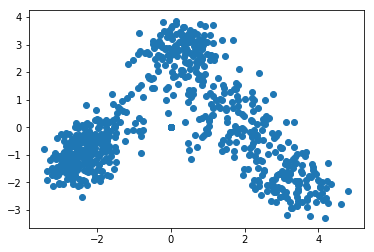

In [225]:
pca = PCA(2).fit(dados)
dados_2d = pca.transform(dados)

X, Y = dados_2d.T
plt.scatter(X, Y)
plt.show()

## Passo 4: Sorteando os centróides iniciais

O K-means tenta encontrar K grupos diferentes, onde cada grupo é caracterizado por um vetor médio (que chamamos centróide) e cada elemento é atribuído ao centróide mais próximo. A inicialização do algoritmo é extremamente simples: basta escolher K pontos aleatoriamente.

Vamos utilizar a função sample do módulo math do Python, já que ela faz exatamente isto:

In [262]:
sample(["foo", "bar", "baz"], 2)

['foo', 'baz']

Adapte o código acima para escolher K = 5 indivíduos aleatoriamente da população completa. Você provavelmente terá que converter a população para um array numpy utilizando `dados.values`. 

In [263]:
K = 5

def sorteia_centroides(elementos, k):
    """
    Escolhe aleatoriamente k elementos da lista fornecida.
    """
    return sample(list(elementos), k)


sorteia_centroides(dados.values, K)

[array([2.        , 1.        , 1.        , 0.        , 1.        ,
        1.        , 2.        , 2.        , 0.        , 0.        ,
        1.        , 2.        , 2.        , 0.        , 2.        ,
        2.        , 1.        , 1.        , 2.        , 1.        ,
        0.        , 2.        , 0.        , 2.        , 2.        ,
        2.        , 1.        , 2.        , 2.        , 2.        ,
        0.        , 0.        , 1.        , 1.        , 2.        ,
        0.        , 2.        , 2.        , 1.        , 2.        ,
        2.        , 2.        , 2.        , 0.98214286, 2.        ,
        2.        ]),
 array([1.        , 1.        , 0.        , 0.        , 0.        ,
        1.        , 1.        , 0.        , 1.        , 2.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        0.        , 1.        , 2.        , 1.        , 0.        ,
        1.        , 2.        , 0.        , 1.        , 1.        ,
        1.        , 1.5698

In [264]:
assert sorteia_centroides([(1, 1), (1, 1)], 1) == [(1, 1)]

## Passo 5: Calculando a distância

O próximo passo consiste em determinar a distância de cada elemento para o centróide, para podermos agrupar cada ponto no seu respectivo grupo. Começamos com um objetivo um pouco mais modesto: calcular a distância entre dois pontos.

Lembre-se da fórmula para dois vetores $u$, e $v$ de $n$ dimensões. 

$$d(\vec u, \vec v) = \sqrt{\sum_{i=0}^{n} \left(u_i - v_i \right)^{2}}$$


In [265]:
# IMPORTANTE: sua fórmula deve funcionar corretamente para vetores 
# de qualquer número de componentes
def distancia(x, y):
    # converte para array, habilitando operações matemáticas 
    # com x e y
    x = np.asarray(x)
    y = np.asarray(y)
    return sqrt(sum((x - y)**2))

u = np.array([10, 8])
v = np.array([13, 4])
print('Distância entre vetores:', distancia(u, v))

Distância entre vetores: 5.0


In [266]:
assert distancia([0, 3], [4, 0]) == 5.0
assert distancia(dados.values[0], dados.values[0]) == 0
assert abs(distancia(dados.values[0], dados.values[1]) - 4.6904) < 1e-3

## Passso 6: encontrando o centroide mais próximo

O passo seguinte no PCA consiste em atribuir cada elemento a um centróide, sempre escolhendo o centróide mais próximo. Nós vamos fazer isto criando uma função que passa pela lista de elementos e retorna uma lista de listas onde cada uma destas listas.

Antes de fazer isto, implementamos a função `mais_proximo` abaixo.

In [267]:
def mais_proximo(x, centros):
    """
    Retorna o índice do centroide mais próximo do elemento
    x na lista de centros dada. 
    """
    
    menor_idx = 0
    menor_distancia = float('inf')
    for i, centro in enumerate(centros):
        d = distancia(x, centro)
        if d < menor_distancia:
            menor_distancia = d
            menor_idx = i
    return menor_idx
    

# Exemplo: o ponto (1, 2) está mais próximo de (1, 1) nos centroides abaixo
mais_proximo((1, 2), [(0, 0), (1, 1), (5, 5), (-3, 4)])

1

In [268]:
assert mais_proximo((1, 2), [(0, 0), (1, 1), (5, 5), (-3, 4)]) == 1
assert mais_proximo(dados.values[1], dados.values[:5]) == 1

## Passo 7: Atribuindo grupos

Agora vamos utilizar a nossa função `mais_proximo` para realmente distribuir os elementos em seus respectivos grupos. Implemente a função `atribui_grupos` abaixo.

In [269]:
def atribui_grupos(elementos, centros):
    """
    Distribui os elementos da lista dada entre os seus respectivos
    centroides. O resultado são K listas diferentes (onde K corresponde
    ao número de centróides). 
    
    Cada elemento é atribuído à lista com o K mais próximo.
    """
    grupos = [[] for _ in centros]
    
    for x in elementos:
        idx = mais_proximo(x, centros)
        grupos[idx].append(x)
    return grupos

# Exemplo: 2 centroides
centros = [(1, 2), (-1, -2)]
pontos = [(1, 1), (2, 2), (-5, -4), (0, 2), (-1, -1)]
g1, g2 = atribui_grupos(pontos, centros)
print('Grupo 1:', g1)
print('Grupo 2:', g2)

Grupo 1: [(1, 1), (2, 2), (0, 2)]
Grupo 2: [(-5, -4), (-1, -1)]


In [270]:
assert atribui_grupos([(-1, -1), (1, 1)], [(1, 2), (-1, -2)]) == [[(1, 1)], [(-1, -1)]]
assert [len(g) for g in atribui_grupos(dados.values, dados.values[:5])] == [40, 84, 11, 367, 237]

## Passo 8: Calculando o centroide

Agora temos uma tarefa bem simples: dado um grupo de pontos, devemos calcular o centróide para fazer a atualização do k-means. Implemente a função centroide que calcula justamente isto.

In [271]:
def centroide(grupo):
    """
    Calcula o centroide (média) de um único grupo de elementos.
    """
    # Converta cada elemento para array para
    # simplificar o cálculo :)
    elems = [np.asarray(x) for x in grupo]
    return sum(elems) / len(grupo)


def centroides(grupos):
    """
    Aplica centroide em cada grupo na lista de grupos e
    retorna uma lista de centroides.
    """
    return [centroide(g) for g in grupos]


# Exemplo: 2 centroides
grupos = [[(1, 1), (2, 2), (0, 2)], [(-5, -4), (-1, -1)]]
centroides(grupos)

[array([1.        , 1.66666667]), array([-3. , -2.5])]

In [272]:
assert all(np.all(x == y)
           for x, y in zip(centroides([[(1, 1), (2, 2)], [(-5, -4), (-1, -1)]]),
                           [np.array([1.5, 1.5]), np.array([-3. , -2.5])]))

## Passo 9: Medindo a variação

Uma maneira de formalizar o que o K-means está fazendo é entender o algoritmo como um processo de minimização. A discussão matemática completa está além do objetivo deste tutorial. De todo jeito, os matemáticos descobriram que o K-means é um processo que minimiza a variação quadrática em cada etapa do algoritmo. A variação quadrática é a soma dos quadrados das distâncias de cada elemento para o seu respectivo centro. 

Intuitivamente, podemos pensar que uma variação quadrática pequena corresponde a situação ideal onde cada elemento está muito próximo do seu respectivo centro e portanto foi corretamente classificado. Implemente a função VQ que calcula a variação quadrática do conjunto de dados. A variação quadrática sempre diminui ou se mantêm constante em cada etapa do k-means.

In [273]:
def vq(grupo):
    """Calcula a variação quadrática"""
    centro = centroide(grupo)
    return sum(distancia(x, centro)**2 for x in grupo)

def vq_total(grupos):
    """Calcula a variação quadrática de todos grupos somados"""
    return sum(vq(g) for g in grupos)

# Exemplo
vq([(0, 0), (1, 1)])  # vq = 1, porque?

1.0000000000000002

In [274]:
assert abs(vq([(0, 0), (1, 1)]) - 1) < 1e-3
assert abs(vq(dados.values[:100]) - 1292.65) < 1e-1

## Passo 10: Iteração completa

Vamos realizar uma iteração completa do algoritmo. Isto corresponde aos passos 
"encontrar centroides mais próximos" e depois "atualizar centroides" da simulação em http://stanford.edu/class/ee103/visualizations/kmeans/kmeans.html. Observe que a variação quadrática sempre diminui quando fazemos uma iteração. Podemos parar o algortimo de k-means quando a variação quadrática parar de se alterar.

In [275]:
k = 5
centros = sorteia_centroides(dados.values, k)

In [281]:
# Execute esta célula várias vezes para ver o VQ diminuir
grupos = atribui_grupos(dados.values, centros)
centros = centroides(grupos)
print('VQ:', vq_total(grupos))

VQ: 11507.185728237015


## Passo 11: juntando as partes

Vamos colocar cada um destes passos dentro de um loop e executar o algoritmo enquanto
a variação quadrática se alterar.

vq: 13469.796619823905
vq: 11759.397695675896
vq: 11546.46955240262
vq: 11477.608524437255
vq: 11266.252190888943
vq: 11050.255425344949
vq: 10876.503709349068
vq: 10858.782854389898
vq: 10858.240623406786
vq: 10858.000118383114


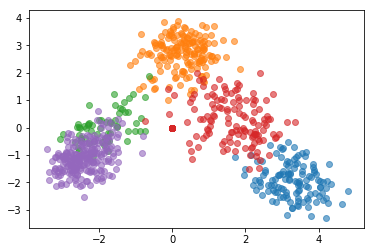

In [286]:
def kmeans(dados, k=4):
    """
    Calcula o K-means para o conjunto de dados.
    """
    
    vq_inicial = None
    centros = sorteia_centroides(dados, k)
    
    while True:
        grupos = atribui_grupos(dados, centros)
        centros = centroides(grupos)
        vq = vq_total(grupos)
        if vq == vq_inicial:
            break
        else:
            vq_inicial = vq
        print('vq:', vq_total(grupos))
    
    # Vamos converter cada grupo para um array 2d ao
    # invés de uma lista de arrays
    return [np.asarray(g) for g in grupos]


# Vamos visualizar os dados com PCA.
pca = PCA(2).fit(dados)

for group in kmeans(dados.values, 5):
    X, Y = pca.transform(group).T
    plt.scatter(X, Y, alpha=0.6)
plt.show()

## Parte 12: Exemplo

Aqui montamos um exemplo com dados fictícios.

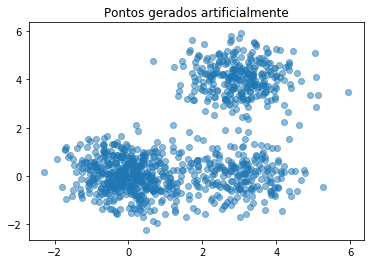

In [260]:
std = .75
g1 = np.random.normal((0, 0), std, size=(500, 2))
g2 = np.random.normal((3, 4), std, size=(300, 2))
g3 = np.random.normal((3, 0), std, size=(200, 2))
completo = np.vstack([g1, g2, g3])

X, Y = completo.T
plt.scatter(X, Y, alpha=0.5)
plt.title('Pontos gerados artificialmente')
plt.show()

vq: 3749.9606008406554
vq: 2464.3637344077406
vq: 1712.9689788377875
vq: 1227.378798429727
vq: 1110.3724188059728
vq: 1092.6195382935236
vq: 1091.2469667526852
vq: 1091.0240300499418
vq: 1090.9020885966522


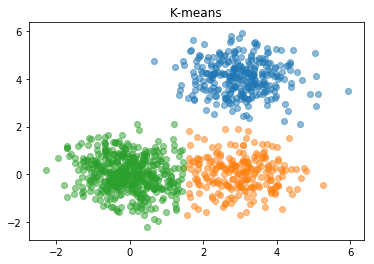

In [261]:
K = 3
for grupo in kmeans(completo, K):
    X, Y = grupo.T
    plt.scatter(X, Y, alpha=0.5)
plt.title('K-means')
plt.show()